In [1]:
from sympy import *

In [2]:
v, x, omega, T = symbols('v, x, omega, T', positive=True, real=True)

In [3]:
eta, M, gamma = symbols('eta, M, gamma', positive=True, real=True)
theta = symbols('theta', real=True, positive=True)
t, t_0 = symbols('t, t_0', real=True)

In [4]:
# unknown T3 coefficients
A_0, A_1, A_2, A_3, A_4, A_5, A_6, A_7 = symbols('A_0, A_1, A_2, A_3, A_4, A_5, A_6, A_7', real=True)

# known T2 coefficients
# a_6l is the part of the a_6 coefficient that contains
# the log terms.
a_0, a_1, a_2, a_3, a_4, a_5, a_6, a_6l, a_7 = symbols('a_0, a_1, a_2, a_3, a_4, a_5, a_6, a_6l, a_7', real=True)

In [85]:
gamma_sub = 0.577216

In [5]:
# TaylorT2 t(v) non-spinning coefficients

# leading order
a_0_sub = 2
# v^2
a_2_sub = (Rational(743,252) + Rational(11,3)*eta)
# v^3
a_3_sub = -Rational(32,5)*pi
# v^4
a_4_sub = Rational(3058673,508032) + Rational(5429,504)*eta + Rational(617,72)*eta**2
# v^5
a_5_sub = -(Rational(7729,252) - Rational(13,3)*eta) * pi

##
# v^6 no-log term
a_6_no_log_sub = (
    -Rational(10052469856691,23471078400) + Rational(128,3)*pi**2 + Rational(6848,105)*gamma + (Rational(3147553127,3048192) - Rational(451,12)*pi**2)*eta
    -Rational(15211,1728)*eta**2 + Rational(25565,1296)*eta**3
)
# v^6 log term
a_6_log_sub = Rational(3424,105)*log(16*omega**Rational(2,3))
# v^6 no-log + log
a_6_sub = a_6_no_log_sub + a_6_log_sub
##

# v^7
a_7_sub = (
    (-Rational(15419335,127008) - Rational(75703,756)*eta + Rational(14809,378)*eta**2) * pi
)

In [6]:
t2_a_coeffs_dict = {
    a_0:a_0_sub,
    a_2:a_2_sub,
    a_3:a_3_sub,
    a_4:a_4_sub,
    a_5:a_5_sub,
    a_6:a_6_sub,
    a_7:a_7_sub,
}

In [7]:
# theta = 
theta_sub = (eta * T / 5 / M)**Rational(-1,8)
theta_sub

5**(1/8)*M**(1/8)/(T**(1/8)*eta**(1/8))

In [8]:
# theta(omega)
theta_of_omega = (
    a_0 * omega**Rational(1,3)
    *
    (
        1
        +
        a_2 * omega**Rational(2,3)
        +
        a_3 * omega
        +
        a_4 * omega**Rational(4,3)
        +
        a_5 * omega**Rational(5,3)
        +
        a_6 * omega**2
        +
        a_7 * omega**Rational(7,3)
    )**Rational(-1,8)
)

In [9]:
theta_of_omega

a_0*omega**(1/3)/(a_2*omega**(2/3) + a_3*omega + a_4*omega**(4/3) + a_5*omega**(5/3) + a_6*omega**2 + a_7*omega**(7/3) + 1)**(1/8)

In [10]:
# first step is to determine the leading order term of omega(theta)

$$
\theta \propto \omega^{1/3}
$$

and therefore

$$
\omega \propto \theta^3
$$

In [11]:
leading_order_theta = solve(Eq(theta, series(theta_of_omega, omega, 0, Rational(2,3)).removeO().subs({a_0:1})), omega)[0]
leading_order_theta

theta**3

In [12]:
# manually plug the result in below

In [13]:
# omega(theta)
omega_of_theta = (
    A_0 * theta**3
    *
    (
        1
        +
        A_2 * theta**2
        +
        A_3 * theta**3
        +
        A_4 * theta**4
        +
        A_5 * theta**5
        +
        A_6 * theta**6
        +
        A_7 * theta**7
    )
)
omega_of_theta

A_0*theta**3*(A_2*theta**2 + A_3*theta**3 + A_4*theta**4 + A_5*theta**5 + A_6*theta**6 + A_7*theta**7 + 1)

# Begin solving term by term

In order to solve this we use a Series Reversion technique

https://mathworld.wolfram.com/SeriesReversion.html

We construct the equation below and solve for the unknown term-by-term.

We do this by expanding the expression to progressively higher orders
and iteratively plugging in solution to $A_i$ coefficients that we find at
previous steps of the process.

$$
\theta = \theta(\omega(\theta))
$$

In [14]:
# this is what we know
theta_of_omega

a_0*omega**(1/3)/(a_2*omega**(2/3) + a_3*omega + a_4*omega**(4/3) + a_5*omega**(5/3) + a_6*omega**2 + a_7*omega**(7/3) + 1)**(1/8)

In [15]:
# this is what we want to find out
omega_of_theta

A_0*theta**3*(A_2*theta**2 + A_3*theta**3 + A_4*theta**4 + A_5*theta**5 + A_6*theta**6 + A_7*theta**7 + 1)

In [16]:
# how to count orders for omega and theta
# 0PN "Newtonian" Term
# \theta \propto \omega^{1/3}
# \omega \propto \theta^3

# 0.5 PN
# This is zero in GR
# but would be 
# \theta \propto \omega^{1/3}
# \omega \propto \theta
# 1 PN
# \theta \propto \omega^{2/3}
# \omega \propto \theta^2
# 1.5 PN
# \theta \propto \omega
# \omega \propto \theta^3
# 2 PN
# \theta \propto \omega^{4/3}
# \omega \propto \theta^4

# when you do
# theta(omega(theta))
# 0PN "Newtonaian" term is
# \theta

# 0.5 PN
# \theta^2
# 1 PN
# \theta^3
# 1.5 PN
# \theta^4
# 2.5 PN
# \theta^5

In [17]:
# keys PN order
# values the exponent of theta
pn_order_map = {
    '0 PN':1,
    '0.5 PN':2,
    '1 PN':3,
    '1.5 PN':4,
    '2 PN':5,
    '2.5 PN':6,
    '3 PN':7,
    '3.5 PN':8,
    '4 PN':9,
}

In [54]:
def solve_for_A(theta_of_omega, omega_of_theta, order, known_subs_dict, unknown, leading_order_omega_of_theta=None):
    # theta(omega(theta))
    t_o_t = theta_of_omega.subs({omega:omega_of_theta})
    # expand to desired order
    t_o_t_series = series(t_o_t, theta, 0, order+1).removeO()
    # construct theta = theta(omega(theta))
    eq = Eq(theta, t_o_t_series)
    # solve for unknown
    soln = solve(eq, unknown)[0]
    soln_subs = soln.subs(known_subs_dict)

    if leading_order_omega_of_theta is not None:
        # deal with log
        soln_subs = soln_subs.subs({omega:leading_order_omega_of_theta}).expand()
    
    return cancel(soln_subs).series(eta).collect(pi)

In [55]:
A_soltions = {}

In [56]:
known_subs_dict = t2_a_coeffs_dict.copy()

In [57]:
unknown=A_0
A_soltions[unknown] = solve_for_A(theta_of_omega, omega_of_theta, pn_order_map['0 PN'], known_subs_dict, unknown)
A_soltions[unknown]

1/8

In [58]:
leading_order_omega_of_theta = A_soltions[A_0] * leading_order_theta
leading_order_omega_of_theta

theta**3/8

In [59]:
known_subs_dict |= A_soltions
unknown=A_2
A_soltions[unknown] = solve_for_A(theta_of_omega, omega_of_theta, pn_order_map['1 PN'], known_subs_dict, unknown)
A_soltions[unknown]

11*eta/32 + 743/2688

In [60]:
known_subs_dict |= A_soltions
unknown=A_3
A_soltions[unknown] = solve_for_A(theta_of_omega, omega_of_theta, pn_order_map['1.5 PN'], known_subs_dict, unknown)
A_soltions[unknown]

-3*pi/10

In [61]:
known_subs_dict |= A_soltions
unknown=A_4
A_soltions[unknown] = solve_for_A(theta_of_omega, omega_of_theta, pn_order_map['2 PN'], known_subs_dict, unknown)
A_soltions[unknown]

371*eta**2/2048 + 56975*eta/258048 + 1855099/14450688

In [62]:
known_subs_dict |= A_soltions
unknown=A_5
A_soltions[unknown] = solve_for_A(theta_of_omega, omega_of_theta, pn_order_map['2.5 PN'], known_subs_dict, unknown)
A_soltions[unknown]

pi*(13*eta/256 - 7729/21504)

In [63]:
known_subs_dict |= A_soltions
unknown=A_6
A_soltions[unknown] = solve_for_A(theta_of_omega, omega_of_theta, pn_order_map['3 PN'], known_subs_dict, unknown, leading_order_omega_of_theta)
A_soltions[unknown]

235925*eta**3/1769472 - 30913*eta**2/1835008 + eta*(25302017977/4161798144 - 451*pi**2/2048) + 107*gamma/280 + 107*log(theta)/280 - 720817631400877/288412611379200 + 107*log(2)/280 + 53*pi**2/200

In [64]:
known_subs_dict |= A_soltions
unknown=A_7
A_soltions[unknown] = solve_for_A(theta_of_omega, omega_of_theta, pn_order_map['3.5 PN'], known_subs_dict, unknown, leading_order_omega_of_theta)
A_soltions[unknown]

pi*(141769*eta**2/1290240 - 97765*eta/258048 - 188516689/433520640)

# comparison

In [69]:
omega_of_theta

A_0*theta**3*(A_2*theta**2 + A_3*theta**3 + A_4*theta**4 + A_5*theta**5 + A_6*theta**6 + A_7*theta**7 + 1)

In [74]:
omega_of_theta.subs(A_soltions)

theta**3*(pi*theta**7*(141769*eta**2/1290240 - 97765*eta/258048 - 188516689/433520640) + theta**6*(235925*eta**3/1769472 - 30913*eta**2/1835008 + eta*(25302017977/4161798144 - 451*pi**2/2048) + 107*gamma/280 + 107*log(theta)/280 - 720817631400877/288412611379200 + 107*log(2)/280 + 53*pi**2/200) + pi*theta**5*(13*eta/256 - 7729/21504) + theta**4*(371*eta**2/2048 + 56975*eta/258048 + 1855099/14450688) - 3*pi*theta**3/10 + theta**2*(11*eta/32 + 743/2688) + 1)/8

In [72]:
theta_of_omega

a_0*omega**(1/3)/(a_2*omega**(2/3) + a_3*omega + a_4*omega**(4/3) + a_5*omega**(5/3) + a_6*omega**2 + a_7*omega**(7/3) + 1)**(1/8)

In [71]:
theta_of_omega.subs(t2_a_coeffs_dict)

2*omega**(1/3)/(pi*omega**(7/3)*(14809*eta**2/378 - 75703*eta/756 - 15419335/127008) + pi*omega**(5/3)*(13*eta/3 - 7729/252) + omega**(4/3)*(617*eta**2/72 + 5429*eta/504 + 3058673/508032) + omega**(2/3)*(11*eta/3 + 743/252) + omega**2*(25565*eta**3/1296 - 15211*eta**2/1728 + eta*(3147553127/3048192 - 451*pi**2/12) + 6848*gamma/105 + 3424*log(16*omega**(2/3))/105 - 10052469856691/23471078400 + 128*pi**2/3) - 32*pi*omega/5 + 1)**(1/8)

In [75]:
import matplotlib.pyplot as plt
import numpy as np

In [158]:
eta_sub = 0.25
# don't go too high or theta will be imaginary
# omega_arr = np.arange(0.001, 0.03, 0.001)
omega_arr = np.linspace(0.0001, 0.03, 100)

In [159]:
len(omega_arr)

100

In [160]:
theta_of_omega_vals = [theta_of_omega.subs(t2_a_coeffs_dict).subs({eta:eta_sub, gamma:gamma_sub, omega:o_}).evalf() for o_ in omega_arr]

In [161]:
theta_of_omega_vals = np.array(theta_of_omega_vals)

In [162]:
# now we compute omega_of_theta using theta_of_omega_vals as input
omega_of_theta_vals = [omega_of_theta.subs(A_soltions).subs({eta:eta_sub, gamma:gamma_sub, theta:th_}).evalf() for th_ in theta_of_omega_vals]

Text(0, 0.5, '$\\theta$')

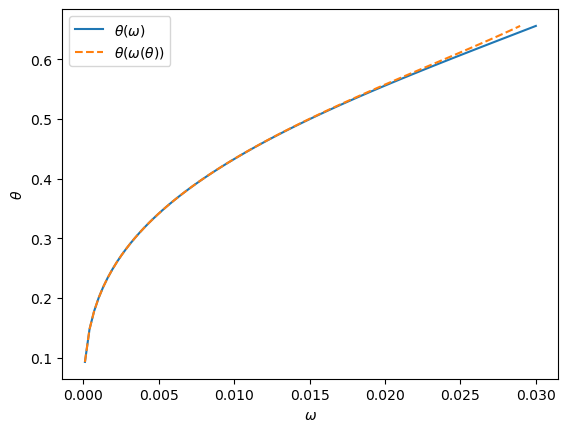

In [163]:
# double check what I'm plotting, the legend and the labels need to be correct.
plt.figure()
plt.plot(omega_arr, theta_of_omega_vals, label=r'$\theta(\omega)$')
plt.plot(omega_of_theta_vals, theta_of_omega_vals, ls='--', label=r'$\theta(\omega(\theta))$')
plt.legend()

plt.xlabel(r"$\omega$")
plt.ylabel(r"$\theta$")

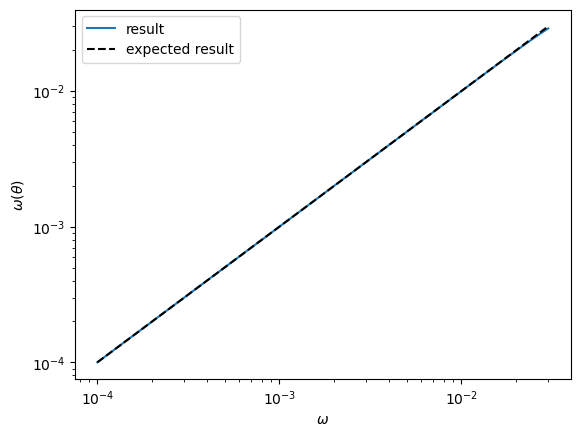

In [164]:
plt.figure()

# expected_result = diagonal line
expected_result = np.linspace(omega_arr[0], omega_arr[-1], 50)


plt.plot(omega_arr, omega_of_theta_vals, label='result')
plt.plot(expected_result, expected_result, ls='--', c='k', label='expected result')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"$\omega$")
plt.ylabel(r"$\omega(\theta)$")

plt.legend()

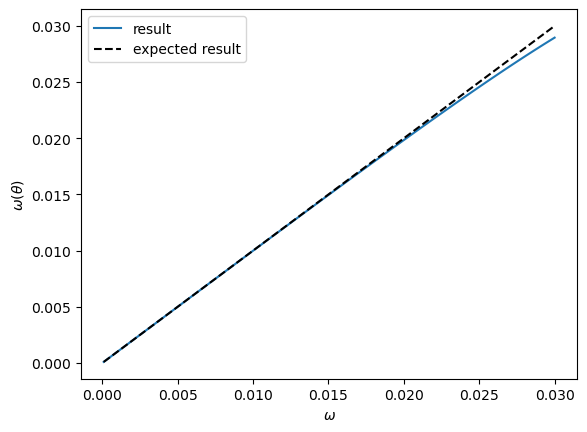

In [165]:
plt.figure()

# expected_result = diagonal line
expected_result = np.linspace(omega_arr[0], omega_arr[-1], 50)


plt.plot(omega_arr, omega_of_theta_vals, label='result')
plt.plot(expected_result, expected_result, ls='--', c='k', label='expected result')

# plt.xscale('log')
# plt.yscale('log')

plt.xlabel(r"$\omega$")
plt.ylabel(r"$\omega(\theta)$")

plt.legend()